# Data Scraping - Get most recent 50 jobs from Vietnamworks

This document shows some basic web scraping steps to crawl Vietnamworks and get 50 newest jobs.

Below are some libraries used in this doc:
* [BeautifulSoup 4](http://www.crummy.com/software/BeautifulSoup/): worker for all scraping activities 
* [requests](http://docs.python-requests.org/en/master/): very powerful library, but main usage in this doc will be send GET requests to some websites 
* [pandas](http://pandas.pydata.org/): very popular data wrangling library 
* [matplotlib](http://matplotlib.org/): a popular Python library for plotting 2D data
* [seaborn](https://stanford.edu/~mwaskom/software/seaborn/): a Python library for statiscal visualization

Install necessary libraries:

In [ ]:
!conda install beautifulsoup4
!conda install requests
!conda install pandas

Import:

In [1]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup

%pylab inline

Populating the interactive namespace from numpy and matplotlib


Go to [Vietnamworks](http://www.vietnamworks.com/), choose any job category, this document will choose [IT-Software](http://www.vietnamworks.com/it-software-jobs-i35-en) and configure so that Vietnamworks display 50 jobs per page.

Store the Vietnamworks URL to crawl in variable 'url':

In [2]:
url = 'http://www.vietnamworks.com/it-software-jobs-i35-en'

Make a GET request to above URL:

In [3]:
req = requests.get(url)

Store the page's DOM in BeautifulSoup:

In [4]:
soup = BeautifulSoup(req.content, 'html.parser')

What does 'soup' look like?

In [5]:
soup

<!DOCTYPE html>\n\n<html lang="en">\n<head>\n<meta charset="unicode-escape">\n<meta content="height=device-height,width=device-width,initial-scale=1.0,maximum-scale=1.0, user-scalable=no" name="viewport">\n<meta content="IE=edge" http-equiv="X-UA-Compatible">\n<meta content="" name="author">\n<meta content="March 22 2016 - Found 1306 IT - Software jobs from top employers at VietnamWork. Search jobs and apply job now!" name="description"/>\n<meta content="IT - Software jobs, search jobs, find jobs, vietnam job, recruitment, employment, career, executive jobs, job opportunities, job seeker, finding job, job site, online jobs, top jobs, vietnamworks, vietnamwork" name="keywords"/>\n<meta content="index, follow" name="robots">\n<meta content="telephone=no" name="format-detection">\n<meta content="http://images.vietnamworks.com/img/thumbnail.png?v=1" property="og:image"/>\n<meta content="IT - Software jobs - VietnamWorks" property="og:title"/>\n<meta content="http://www.vietnamworks.com/it-

Now what we need to do is to find the DOM element that contains all the job posts in this page. After inspecting the code using Developer Tools, we know that these 50 job posts are stored in a **table** element with classes **"table table-hover link-list table-expanded"**. 

Let's get that element out of the page's DOM using BeautifulSoup, by looking for **table** element with class **link-list**. One class maybe enough to get the desired table from this website, but it will be different for different websites:

In [6]:
jobs_table = soup.find('table', {'class': 'link-list'})

Let's take a look at this:

In [7]:
jobs_table

<table class="table table-hover link-list table-expanded">\n<tbody>\n<!-- Job -->\n<tr class="job-post">\n<td>\n<div class="relative">\n<div class="row ">\n<!-- Logo  -->\n<div class="col-sm-3 col-sm-push-9 text-center">\n<span class="hidden-xs">\n<a class="" href="/jobseekers/checkAuthenticate.php?lang=2">\n<span class="push-top-xxs blue">Login to view salary</span>\n</a>\n</span>\n<a href="http://www.vietnamworks.com/ky-su-cong-nghe-thong-tin-van-phong-quoc-gia-lang-tre-em-sos-viet-nam-650241-jd" target="_blank">\n<div class="logo">\n<img class="img-responsive" src="http://images.vietnamworks.com/pictureofcompany/3e/10204591.jpg" title="V\u0103n Ph\xf2ng Qu\u1ed1c Gia \u2013 L\xe0ng Tr\u1ebb Em SOS Vi\u1ec7t Nam">\n</img></div>\n</a>\n</div>\n<div class="col-sm-1 col-sm-pull-3 awe-check hidden-xs">\n<input id="jobStatus650241" type="hidden" value=""/>\n<div class="checkbox checkbox-success">\n<input class="select-job" data-jobalias="ky-su-cong-nghe-thong-tin-van-phong-quoc-gia-lang-t

Through the look of it at first, I think we already got what we are looking for. Now, get all job posts in this table, using BeautifulSoup **find_all()** method. 

The result will be a list of all job posts, each job will be stored in a **tr** element, a table row:

In [8]:
tr_tags = jobs_table.find_all('tr', {'class': 'job-post'})

How many job posts are there?

In [9]:
len(tr_tags)

50

Exactly 50, just as we expected. So we are going in the right direction!

Now, it's time to scrape detail information for each job. We will extract the following:
* Job title
* Company
* Location
* Link

Because there are 50 jobs, so we will store each piece of information in a separate list. So totally 4 lists are created, one for **Job title**, one for **Company** and so on. This is handy because we can use these lists to formulate a Pandas Frame later, which is a very powerful for data management if we want to explore the data further.

First, get the **Job title**:

In [10]:
job_titles = [title.find('a', {'class': 'job-title'}).contents[0] for title in tr_tags]
# Now take a look at first 3 titles
job_titles[:5]

[u'K\u1ef9 S\u01b0 C\xf4ng Ngh\u1ec7 Th\xf4ng Tin ( V\u0103n Ph\xf2ng Qu\u1ed1c Gia L\xe0ng Tr\u1ebb EM SOS Vi\u1ec7t Nam )',
 u'Nh\xe2n Vi\xean X\u1eed L\xfd B\u1ea3n V\u1ebd CAD Bi\u1ebft Ti\u1ebfng Nh\u1eadt',
 u'Nh\xe2n Vi\xean CNTT ( Qu\u1ea3n Tr\u1ecb Ph\u1ea7n M\u1ec1m, Qu\u1ea3n Tr\u1ecb H\u1ea1 T\u1ea7ng )',
 u'Senior Java Web Developer ($1,000 ~ $1,200)',
 u'Project Manager \u2013 Microsoft Technology']

It seems good. So what happened?

For each **tr** tag in the **jobs_table**, we find the **a** tag with class **job-title**. This will return the DOM for the job's title along with its hyperlink. Because we know that there will be only one **a** tag with class **job-title**, the **find()** method works fine. Then **contents** variable is used to get the text between open and close **a** tag. This variable will return a list with 1 element, so **[0]** will get the first element out, which is the title itself.

Next we will get the remaining information for each job post and store them in corresponding list. The logic is the same. All we need to do is to inspect the DOM that contains necessary information and use BeautifulSoup to extract it.

In [11]:
# Get hyperlink to job's detail page
job_links = [job.find('a', 'job-title').get('href') for job in tr_tags]

# Employer
job_companies = [job.find('span', 'name').contents[0] for job in tr_tags]

# Job's location
job_locations = [job.find('p', 'job-info').contents[1].find('span').contents[0] for job in tr_tags]

After getting all required pieces of data, we may proceed to combine them into a data structure that is more useful for further analysis. Pandas DataFrame is the best candidate for this job. To read more about Pandas, please refer to the link at the beginning of this document.

In [12]:
data = pd.DataFrame({'title': job_titles, 
                    'company': job_companies,
                    'job_location': job_locations, 
                    'link': job_links})

data.head(5)

,company,job_location,link,title
0,Văn Phòng Quốc Gia – Làng Trẻ Em SOS Việt Nam,Ha Noi,http://www.vietnamworks.com/ky-su-cong-nghe-th...,Kỹ Sư Công Nghệ Thông Tin ( Văn Phòng Quốc Gia...
1,Công Ty TNHH Csl Cad Việt Nam,Ho Chi Minh,http://www.vietnamworks.com/nhan-vien-xu-ly-ba...,Nhân Viên Xử Lý Bản Vẽ CAD Biết Tiếng Nhật
2,Công Ty Cổ Phần Tiến Bộ Quốc Tế (AIC),Ha Noi,http://www.vietnamworks.com/nhan-vien-cntt-qua...,"Nhân Viên CNTT ( Quản Trị Phần Mềm, Quản Trị H..."
3,Nextop Co. Ltd,Ha Noi,http://www.vietnamworks.com/senior-java-web-de...,"Senior Java Web Developer ($1,000 ~ $1,200)"
4,Robert Bosch Engineering Vietnam,Ho Chi Minh,http://www.vietnamworks.com/project-manager-mi...,Project Manager – Microsoft Technology


DataFrame helps us to view, transform and visualize data very effectively. For example, you can get the overview of how many jobs out of 50 extracted jobs above are based in Hanoi, Ho Chi Minh, ...

To do this, we can use **matplotlib** and **seaborn** with a painless function as below:

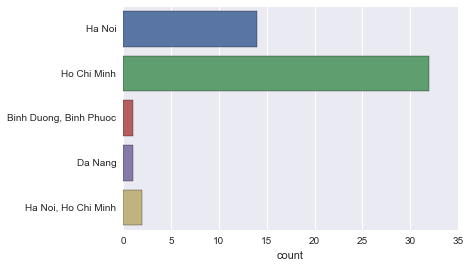

In [13]:
sns.countplot(y=job_locations, data=data)

So clearly, the vast majority number of jobs are based in Ho Chi Minh city.

Visit **matplotlib** and **seaborn** websites for more.